# Explore basinhopping algorithm

scipy.optimzie.basinhopping

In great parts taken from the scipy example: [https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.optimize.basinhopping.html]

## Import stuff

In [26]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from scipy.optimize import basinhopping

## 1d example

global minimum: x = -0.1951, f = -1.0009


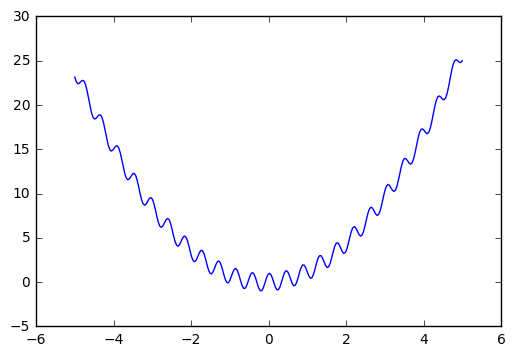

In [27]:
# Define function 1d function whose global minimum is of interest.
# It has many local minima
fct = lambda x : np.cos(14.5 * x - 0.3) + (x + 0.2) * x

# Show this function
xres = 256
xmin = -5.
xmax = 5.
x    = np.linspace(xmin, xmax, xres)
plt.plot(x, fct(x))

# Set up the arguments to the local minimizer that basinhopping internally uses
minimizer_kwargs = {'method' : 'BFGS'}

# Set the initial guess
x0  = [1.]

# Run
ret = basinhopping(fct, x0, minimizer_kwargs=minimizer_kwargs, niter=200)

# Print the result
print('global minimum: x = %.4f, f = %.4f' % (ret.x, ret.fun))

## 2d example

In [28]:
# Define 2d function whose global minimum is of interest.
# This time, the function also provides gradient information.
def func2d(x):
    f     = np.cos(14.5 * x[0] - 0.3) + (x[1] + 0.2) * x[1] + (x[0] + 0.2) * x[0]
    df    = np.zeros(2)
    df[0] = -14.5 * np.sin(14.5 * x[0] - 0.3) + 2. * x[0] + 0.2
    df[1] = 2. * x[1] + 0.2
    return f, df

# Set up the arguments to the local minimizer that basinhopping internally uses.
# Tell the minimizer that gradient information is available from the function.
minimizer_kwargs = {"method":"L-BFGS-B", "jac":True}

# Set the initial guess
x0 = [1.0, 1.0]

# Run
ret = basinhopping(func2d, x0, minimizer_kwargs=minimizer_kwargs, niter=200)

# Print results
print("global minimum: x = [%.4f, %.4f], f = %.4f" % (ret.x[0], ret.x[1], ret.fun))

global minimum: x = [-0.1951, -0.1000], f = -1.0109


In [29]:
# Define a custom step taking routine that uses bigger steps in one dimension than in the other.
class MyTakeStep(object):
    def __init__(self, stepsize=0.5):
        self.stepsize = stepsize
    def __call__(self, x):
        s      = self.stepsize
        x[0]  += np.random.uniform(-2.*s, 2.*s)
        x[1:] += np.random.uniform(-s, s, x[1:].shape)
        return x

# Use the same 2d function as before, now with the custom step taker
mytakestep = MyTakeStep()
ret = basinhopping(func2d, x0, minimizer_kwargs=minimizer_kwargs, niter=200, take_step=mytakestep)
print("global minimum: x = [%.4f, %.4f], f(x0) = %.4f" % (ret.x[0], ret.x[1], ret.fun))

global minimum: x = [-0.1951, -0.1000], f(x0) = -1.0109


In [30]:
# Define a callback function
def print_fun(x, f, accepted):
    print("at minimum %.4f accepted %d" % (f, int(accepted)))

# Use the same 2d function as before, together with the callback function
np.random.seed(1)
ret = basinhopping(func2d, x0, minimizer_kwargs=minimizer_kwargs, niter=10, callback=print_fun)

at minimum 0.4159 accepted 1
at minimum -0.9073 accepted 1
at minimum -0.1021 accepted 1
at minimum -0.1021 accepted 1
at minimum 0.9102 accepted 1
at minimum 0.9102 accepted 1
at minimum 2.2945 accepted 0
at minimum -0.1021 accepted 1
at minimum -1.0109 accepted 1
at minimum -1.0109 accepted 1


In [37]:
# Implement a custom accept test. It will be used to judge if a step is acceptable or not but it's not the only criterion!
class MyBounds(object):
    def __init__(self, xmax=[1.1,1.1], xmin=[-1.1,-1.1] ):
        self.xmax = np.array(xmax)
        self.xmin = np.array(xmin)
    def __call__(self, **kwargs):
        x = kwargs["x_new"]
        tmax = bool(np.all(x <= self.xmax))
        tmin = bool(np.all(x >= self.xmin))
        return tmax and tmin

# Run
mybounds = MyBounds()
ret = basinhopping(func2d, x0, minimizer_kwargs=minimizer_kwargs, niter=10, accept_test=mybounds, callback=print_fun)

at minimum -0.9073 accepted 1
at minimum -0.4317 accepted 0
at minimum -0.9073 accepted 1
at minimum -0.9073 accepted 1
at minimum -0.4317 accepted 1
at minimum -1.0109 accepted 1
at minimum -0.7425 accepted 0
at minimum -0.7425 accepted 1
at minimum -0.7425 accepted 1
at minimum -1.0109 accepted 1
